### Team 5
### ALY 6015
### Homework Group Assignment 4
### Winter A 2020
### Last Updated 02/11/2020

# Introduction:
This is a classification dataset about heart disease which was collected from Cleveland. We will be applying many machine learning techniques including logistic regression, decision tree, and random forest to this dataset and predict who are more likely to get a heart disease and what is the major factor that causes a person to get the heart disease.

## Columns:
- Age: age of patients
- sex: 1 = male ; 0 = female
- cp: chest pain type: 1=typical angina; 2=atypical angine; 3=non-anginal pain; 4=asymptomatic
- trestbps: resting blood pressure (mm Hg)
- chol: serum cholestrol (mg/dl)
- fasting blood sugar: 1 if > 120 mg/dl; 0 otherwise
- resecg: resting electrocardiographic results: 0=normal; 1=having ST-T wave abnormality; 2=showing probable or definite left ventricular hypertrophy
- thalach: maximum heart rate achieved
- exang: exercise induced angina: 1=yes; 0=no
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment: 1=upsloping; 2=flat; 3=downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3=normal; 6=fixed defect; 7=reversable defect
- num: predicted attribute; 0=HEART DISEASE; 1=NO HEART DISEASE

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from pandas_datareader import data, wb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_url='https://docs.google.com/spreadsheets/d/e/2PACX-1vRBlVmRtrZI9aH1a94hL5JKTysOD23t4X3EkWzVmVqwDhp77sfrwM6322Net4ng_M56TgPusIjdQRn9/pub?gid=1933093409&single=true&output=csv'

In [ ]:
df = pd.read_csv(data_url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
num         303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We don't need to encode because all of the values are numeric.

# Exploratory Data Analysis

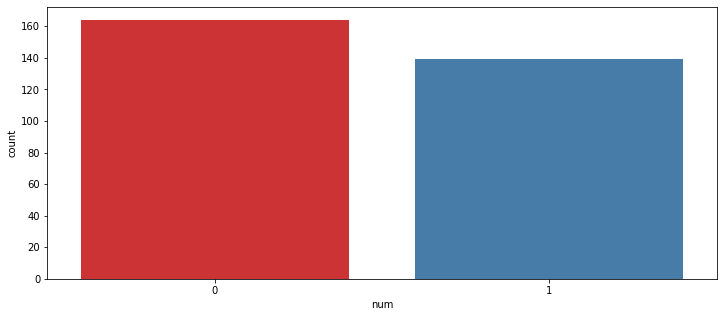

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="num", data=df, palette="Set1")
plt.show()

In [ ]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 32.01%
Percentage of Male Patients: 67.99%


In [ ]:
df.groupby('num').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
num,,,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,-1829.000000,-605.981707
1,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,-718.294964,-713.625899


In [ ]:
# Show some statistics about dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


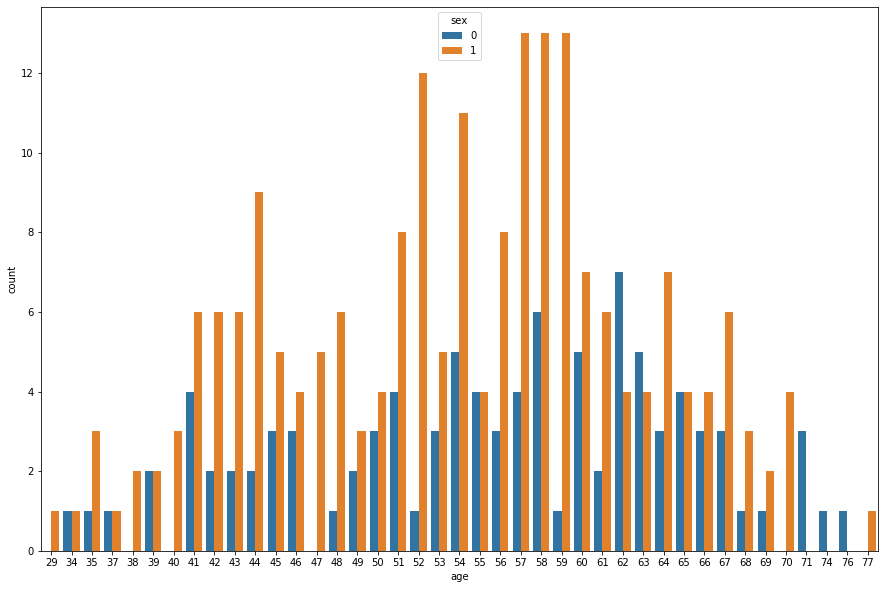

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='age' ,hue='sex',data=df)
plt.show()

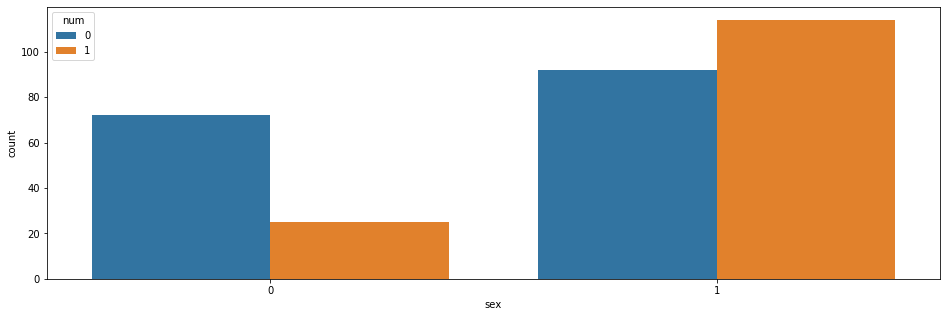

In [ ]:
plt.figure(figsize=(16,5))
sns.countplot(x='sex', hue='num',data=df)
plt.show()

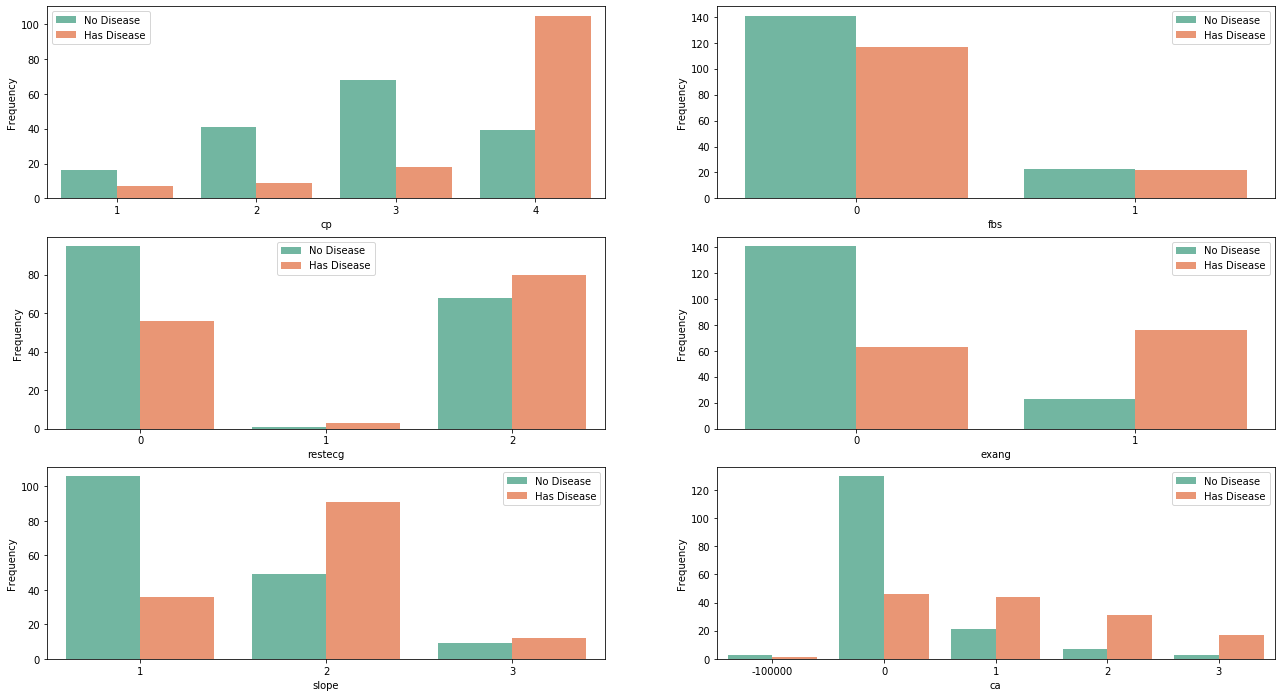

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(22,12))
series = ['cp', 'fbs', 'restecg','exang', 'slope', 'ca']
for i, X in enumerate(axes.flat):
    sns.countplot(x=series[i], hue='num', data=df, palette='Set2', ax=X)
    X.set(ylabel='Frequency')
    X.legend(["No Disease", "Has Disease"])

In [ ]:
age_unique=sorted(df.age.unique())
group_values=df.groupby('age')['chol'].count().values
mean_chol=[]
for i,age in enumerate(age_unique):
    mean_chol.append(sum(df[df['age']==age].chol)/group_values[i])

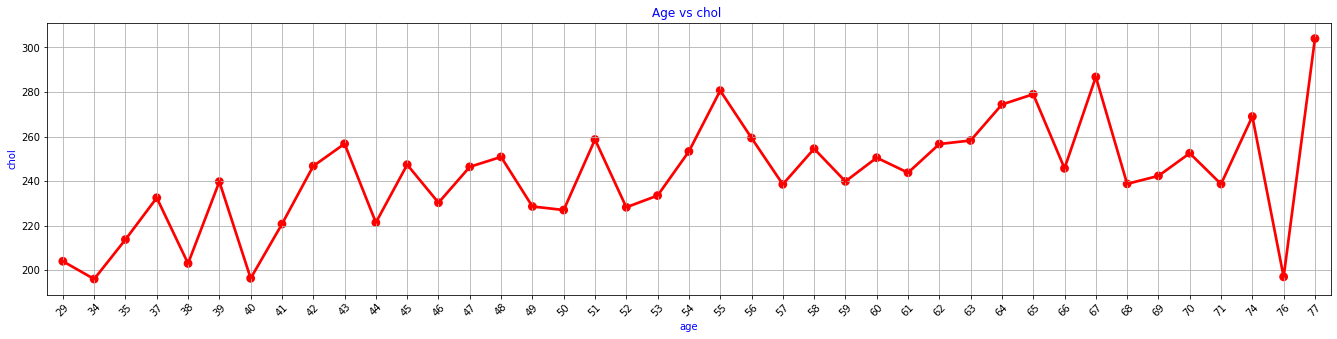

In [ ]:
plt.figure(figsize=(23,5))
sns.pointplot(x=age_unique,y=mean_chol,color='red')
plt.xlabel('age',color='blue')
plt.xticks(rotation=45)
plt.ylabel('chol',color='blue')
plt.title('Age vs chol ',color='blue')
plt.grid()
plt.show()

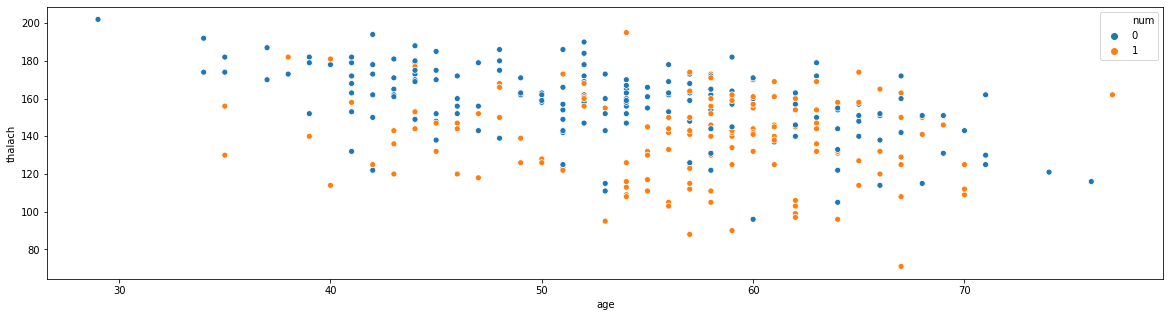

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='age',y='thalach',data=df,hue='num')
plt.show()

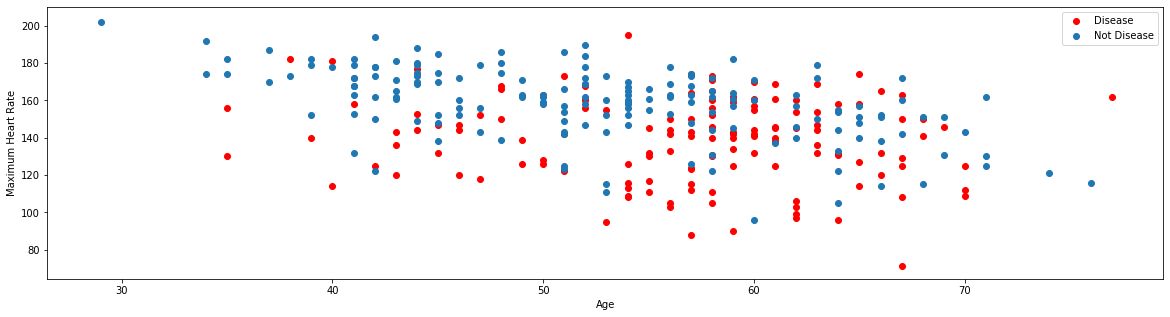

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(x=df.age[df.num==1], y=df.thalach[(df.num==1)], c="red")
plt.scatter(x=df.age[df.num==0], y=df.thalach[(df.num==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

# Data Analysis Part 1

For the data analysis we assigned the target variable to y and the independent variables to X, and split the data, we split the data for training and testing.

In [ ]:
X=df.drop('num',axis=1)
y=df.num

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

## Logistic Regression

Logistic Regression is the basic classifer, and the effective model.
Here we build basic logistics Regression and gave the classification report for the model.

classification report for Logistic regression
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        44
           1       0.71      0.69      0.70        32

    accuracy                           0.75        76
   macro avg       0.74      0.74      0.74        76
weighted avg       0.75      0.75      0.75        76

Accuracy on Test Set for Logistic Regression : 0.75
Logistic Regression (liblinear) CrossVal Train Set Accuracy Mean: 0.80 and Standard Deviation: 0.02 



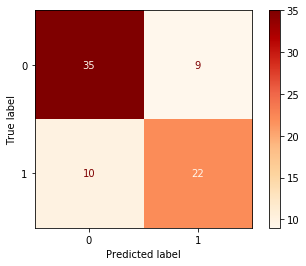

In [ ]:
# logistic
warnings.filterwarnings('ignore')

classifier1=LogisticRegression().fit(X_train,y_train)
y_pred1=classifier1.predict(X_test)
print("classification report for Logistic regression")
print(classification_report(y_test,y_pred1))
plot_confusion_matrix(classifier1,X_test,y_test,cmap='OrRd')
cm1 = confusion_matrix( y_test, y_pred1 )
print("Accuracy on Test Set for Logistic Regression : %.2f" % ((cm1[0,0] + cm1[1,1] )/len(X_test)))
scoresLR1 = cross_val_score( classifier1, X_train, y_train, cv=2)
print("Logistic Regression (liblinear) CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scoresLR1.mean(), scoresLR1.std() ))

In [ ]:
accuracies = {}
acc = classifier1.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc


## Decision Tree Classifier (entropy)


The basic decison tree is split based on entrophy, here we built a basic decision tree and measured its performance with f1-score of 0.76.

Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        44
           1       0.67      0.75      0.71        32

    accuracy                           0.74        76
   macro avg       0.73      0.74      0.73        76
weighted avg       0.74      0.74      0.74        76

Accuracy on Test Set for Decision Tree (entropy) = 0.74
Mean Decision Tree (entropy) CrossVal Train Set Accuracy Mean: 0.66 and Standard Deviation: 0.01 



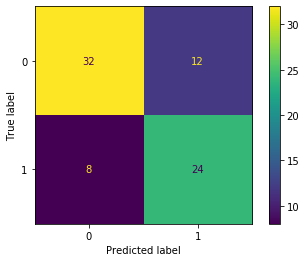

In [ ]:
# Decision Tree
classifier3 = DecisionTreeClassifier()
classifier3.fit( X_train, y_train )
y_pred3 = classifier3.predict( X_test )

cm3 = confusion_matrix( y_test, y_pred3 )
plot_confusion_matrix(classifier3,X_test,y_test)
print("Classification report for Decision Tree")
print(classification_report(y_test,y_pred3))
print("Accuracy on Test Set for Decision Tree (entropy) = %.2f" % ((cm3[0,0] + cm3[1,1] )/len(X_test)))
scoresDT3 = cross_val_score( classifier3, X_train, y_train, cv=2)
print("Mean Decision Tree (entropy) CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scoresDT3.mean(), scoresDT3.std() ))

In [ ]:
acc = classifier3.score(X_test,y_test)*100
accuracies['Decision Tree'] = acc

## Random Forest Classifier
Best Performance
- It has the highest accuracy score which is 0.86. The logistic regression has an accuracy score of 0.75 and the decision tree has 0.71.

Classification report for Random Forest
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        44
           1       0.67      0.75      0.71        32

    accuracy                           0.74        76
   macro avg       0.73      0.74      0.73        76
weighted avg       0.74      0.74      0.74        76

Accuracy on Test Set for Random Forest = 0.83
Mean Decision Tree (entropy) CrossVal Train Set Accuracy Mean: 0.76 and Standard Deviation: 0.03 



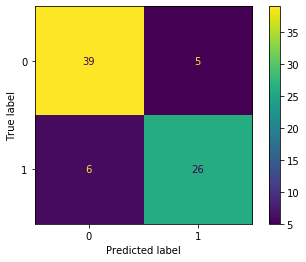

In [ ]:
# Random Forests
classifier4 = RandomForestClassifier()
classifier4.fit( X_train, y_train )
y_pred4 = classifier4.predict( X_test )

cm4 = confusion_matrix( y_test, y_pred4 )
plot_confusion_matrix(classifier4,X_test,y_test)
print("Classification report for Random Forest")
print(classification_report(y_test,y_pred3))
print("Accuracy on Test Set for Random Forest = %.2f" % ((cm4[0,0] + cm3[1,1] )/len(X_test)))
scoresRF4= cross_val_score( classifier4, X_train, y_train, cv=2)
print("Mean Decision Tree (entropy) CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scoresRF4.mean(), scoresRF4.std() ))

In [ ]:
acc = classifier4.score(X_test,y_test)*100
accuracies['Random Forest'] = acc

# SUPPORT VECTOR MACHINE

Classification report
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        44
           1       0.00      0.00      0.00        32

    accuracy                           0.58        76
   macro avg       0.29      0.50      0.37        76
weighted avg       0.34      0.58      0.42        76

confusion matrix is


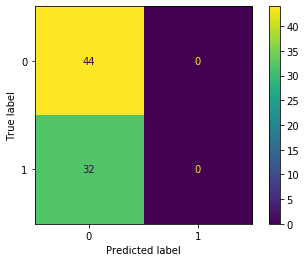

In [ ]:
classifier5=SVC().fit(X_train,y_train)
y_pred5=classifier5.predict(X_test)
plot_confusion_matrix(classifier5,X_test,y_test)
print('Classification report')
print(classification_report(y_test,y_pred5))
print("confusion matrix is")
plt.show()

In [ ]:
acc = classifier5.score(X_test,y_test)*100
accuracies['SVM'] = acc

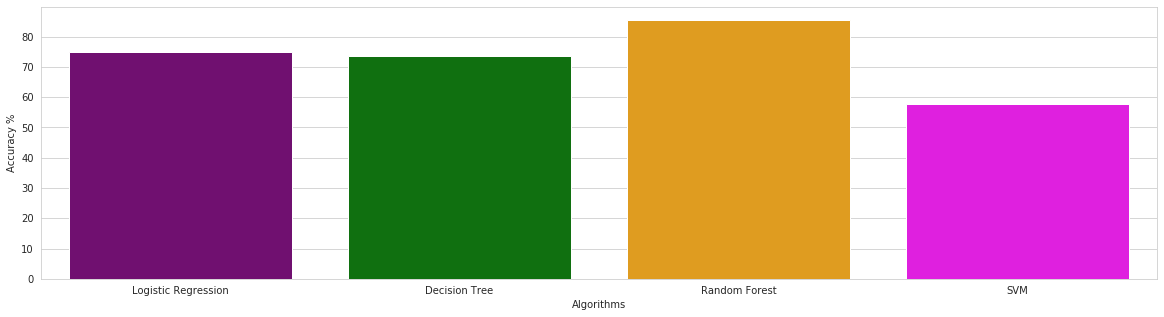

In [ ]:
colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(20,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

Hyper parameter tuning is the process of finding the best parameters for a model and to minimize the effect of underfitting and overfitting.

**Hyper parameter tuning using Random search cv for differant models **

**Logistic Regression**

For logistic regression we have tuned the parameters and the found the best fit, suing that we build a model,predicted the values and plotted the confusion matrix.

In [ ]:
lc=RandomizedSearchCV(LogisticRegression(random_state=30),{
    'C':[5,10,15,20],
    'max_iter':[100,150,200,250]

},cv=5,return_train_score=False,n_iter=2)

In [ ]:
lc.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=30,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'C': [5, 10, 15, 20],
                                        'max_iter': [100, 150, 200, 250]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
lc.best_params_

{'C': 10, 'max_iter': 250}

In [ ]:
 lc.best_score_


0.8192270531400965

Classification report is given as 
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        44
           1       0.74      0.72      0.73        32

    accuracy                           0.78        76
   macro avg       0.77      0.77      0.77        76
weighted avg       0.78      0.78      0.78        76

Condusion matrix is


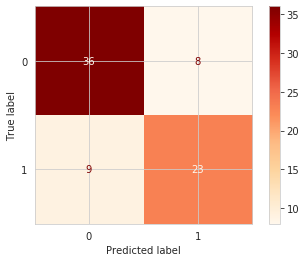

In [ ]:
lc_hy=LogisticRegression(random_state=30,C=15,max_iter=200).fit(X_train,y_train)
hy_pred1=lc_hy.predict(X_test)
print("Classification report is given as ")
print(classification_report(y_test,hy_pred1))
print("Condusion matrix is")
plot_confusion_matrix(lc_hy,X_test,y_test,cmap='OrRd')
plt.show()

In [ ]:
acc2 = lc_hy.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc2

**DecisionTree Classifier**

Decision Tree Classifier is the most affected model by overfitting, for decisiontree we tuned various paramaters like max_depth,crtierion,min_samples_split etc.,

In [ ]:
dt=RandomizedSearchCV(DecisionTreeClassifier(),{
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[2,4,6,8,10],
    'min_samples_split':[1,2,3]
},cv=5,return_train_score=False,n_iter=2)

In [ ]:
dt.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
dt.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
dt.best_score_

0.7263768115942029

Classification report is given as 
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        44
           1       0.64      0.78      0.70        32

    accuracy                           0.72        76
   macro avg       0.73      0.73      0.72        76
weighted avg       0.74      0.72      0.73        76

confusion matrix is


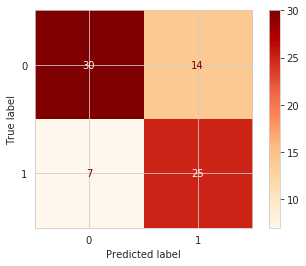

In [ ]:
dt_hy=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=6,min_samples_split=2).fit(X_train,y_train)
hy_pred2=dt_hy.predict(X_test)
print("Classification report is given as ")
print(classification_report(y_test,hy_pred2))
print('confusion matrix is')
plot_confusion_matrix(dt_hy,X_test,y_test,cmap='OrRd')
plt.show()

In [ ]:
acc2 = dt_hy.score(X_test,y_test)*100
accuracies['Decision Tree'] = acc2

**RandomForestClassifier**

For RandomForestClassifier the best performing model is with n_estimators=40,min_samples_split=2 and max_depth=10.

In [ ]:
rf=RandomizedSearchCV(RandomForestClassifier(),{

    'n_estimators':[20,40,60],
    'max_depth':[6,8,10],
    'min_samples_split':[1,2,3]
},cv=5,return_train_score=False,n_iter=2)

In [ ]:
rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 40}

In [ ]:
rf.best_score_

0.797487922705314

Classification report is 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        44
           1       0.84      0.81      0.83        32

    accuracy                           0.86        76
   macro avg       0.85      0.85      0.85        76
weighted avg       0.85      0.86      0.85        76

confusion matrix is 


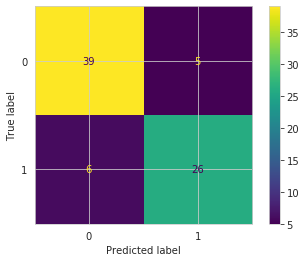

In [ ]:
rf_hy=RandomForestClassifier(n_estimators=60,max_depth=6,min_samples_split=3).fit(X_train,y_train)
hy_pred3=rf_hy.predict(X_test)
print('Classification report is ')
print(classification_report(y_test,hy_pred3))
print("confusion matrix is ")
plot_confusion_matrix(rf_hy,X_test,y_test)
plt.show()

In [ ]:
acc2 = rf_hy.score(X_test,y_test)*100
accuracies['Random Forest'] = acc2

**Support Vector Machine**

In [ ]:
rlf=RandomizedSearchCV(SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False,n_iter=2)

In [ ]:
rlf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
rlf.best_score_

0.8371014492753623

In [ ]:
rlf.best_params_

{'C': 1, 'kernel': 'linear'}

classification report is
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        44
           1       0.71      0.69      0.70        32

    accuracy                           0.75        76
   macro avg       0.74      0.74      0.74        76
weighted avg       0.75      0.75      0.75        76

confusion matrix is 


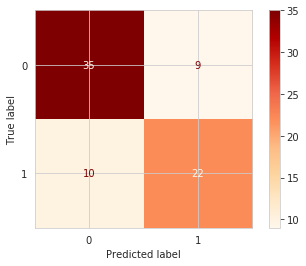

In [ ]:
svm_hy=SVC(gamma='auto',C=20,kernel='linear').fit(X_train,y_train)
hy_pred4=svm_hy.predict(X_test)
print("classification report is")
print(classification_report(y_test,hy_pred4))
print("confusion matrix is ")
plot_confusion_matrix(svm_hy,X_test,y_test,cmap='OrRd')
plt.show()

In [ ]:
acc2 = svm_hy.score(X_test,y_test)*100
accuracies['SVM'] = acc2

We plotted the performance acuuracy of various models and we can say from the graph that the RandomForestClassifier is the best model among them.

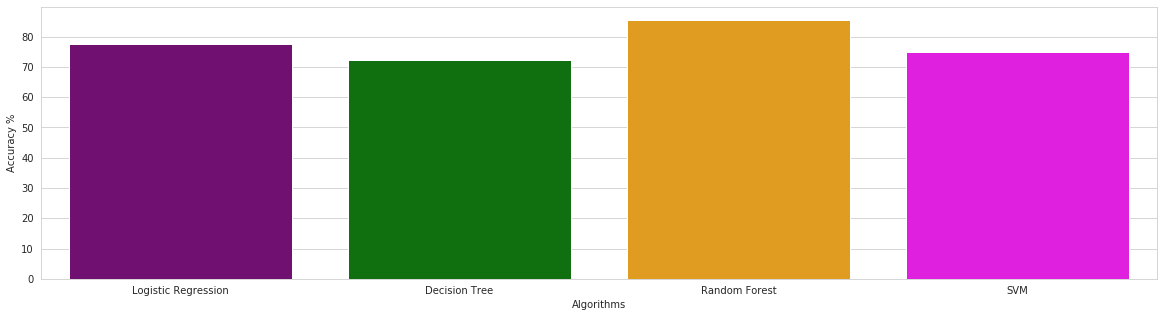

In [ ]:
colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(20,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()